In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import keras

In [2]:
img=image.load_img('/content/drive/My Drive/cnn_data/train/category 1/category 1_original_1000.png_01b3b4fc-dabe-457d-9159-3c2e7eb77785.png')

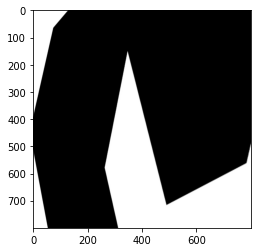

In [3]:
plt.imshow(img)

In [4]:
cv2.imread('/content/drive/My Drive/cnn_data/train/category 1/category 1_original_1000.png_01b3b4fc-dabe-457d-9159-3c2e7eb77785.png').shape

(800, 800, 3)

In [5]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset=train.flow_from_directory('/content/drive/My Drive/cnn_data/train/',
                                        target_size=(200,200),batch_size=3,class_mode='categorical')

Found 441 images belonging to 4 classes.


In [7]:
Validation_dataset=validation.flow_from_directory('/content/drive/My Drive/cnn_data/test/',
                                        target_size=(200,200),batch_size=3,class_mode='categorical')

Found 30 images belonging to 4 classes.


In [8]:
Validation_dataset.classes

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3], dtype=int32)

In [55]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Dropout(0.2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Dropout(0.2),
                                  #flatten layer
                                  tf.keras.layers.Flatten(),
                                  #Dance layer
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  #tf
                                  tf.keras.layers.Dense(4,activation='softmax')

                                  
]
)


In [56]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 64)       

In [58]:
rms=keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=rms,
              metrics=['categorical_accuracy'])

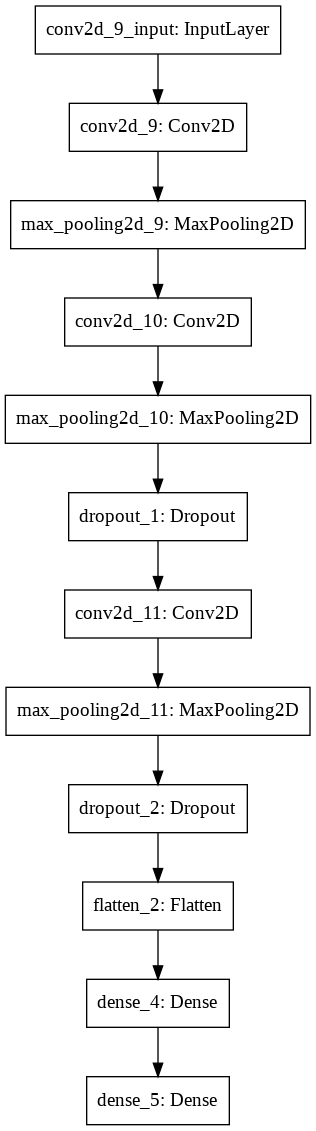

In [59]:
from keras.utils import plot_model
plot_model(model,to_file='model.png')

In [60]:
from keras.callbacks import History
history=History()
model.fit_generator(train_dataset,
                    epochs=20, 
                     steps_per_epoch=20,
                    callbacks=[history],
                    validation_data=Validation_dataset, validation_steps=2)

Epoch 1/20
20/20 [==============================] - 1s 44ms/step - loss: 4.9819 - categorical_accuracy: 0.4167 - val_loss: 1.2878 - val_categorical_accuracy: 0.5000
Epoch 2/20
20/20 [==============================] - 1s 38ms/step - loss: 0.8313 - categorical_accuracy: 0.6667 - val_loss: 0.2261 - val_categorical_accuracy: 1.0000
Epoch 3/20
20/20 [==============================] - 1s 37ms/step - loss: 0.7851 - categorical_accuracy: 0.6833 - val_loss: 0.3355 - val_categorical_accuracy: 0.8333
Epoch 4/20
20/20 [==============================] - 1s 38ms/step - loss: 0.5571 - categorical_accuracy: 0.8333 - val_loss: 0.3236 - val_categorical_accuracy: 0.8333
Epoch 5/20
20/20 [==============================] - 1s 38ms/step - loss: 0.4882 - categorical_accuracy: 0.8000 - val_loss: 0.3468 - val_categorical_accuracy: 0.8333
Epoch 6/20
20/20 [==============================] - 1s 37ms/step - loss: 0.2809 - categorical_accuracy: 0.9167 - val_loss: 1.0284 - val_categorical_accuracy: 0.6667
Epoch 7/20

In [61]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


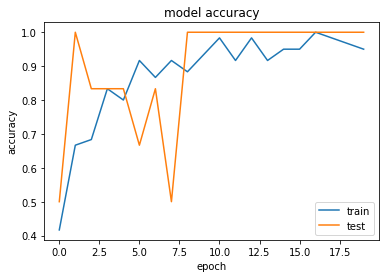

In [64]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='lower right')
plt.show()

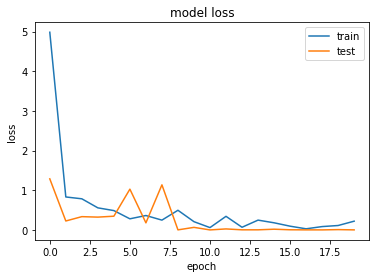

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()